In [3]:
import pandas as pd
da=pd.read_csv('/content/drive/MyDrive/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [ ]:
da.shape

(5735, 28)

In [ ]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [ ]:
da['BMXHT']

0       184.5
1       171.4
2       170.1
3       160.9
4       164.9
        ...  
5730    165.8
5731    182.2
5732    152.2
5733    173.3
5734    165.0
Name: BMXHT, Length: 5735, dtype: float64

In [ ]:
da['BMXHT'].mean()

166.1428344791116

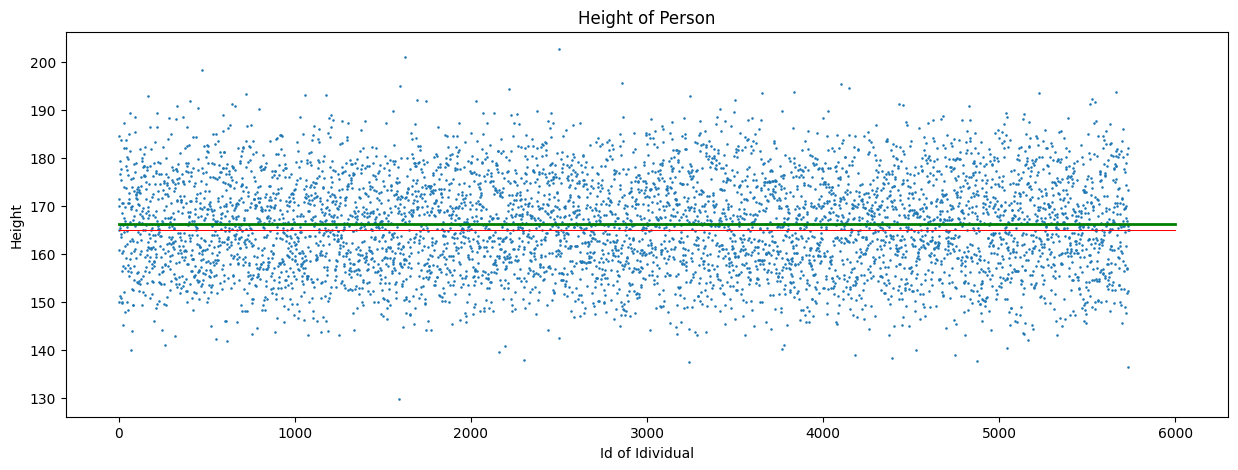

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
x=range(da['BMXHT'].size)
y=da['BMXHT']
plt.scatter(x,y, marker='o',s=0.7)

plt.title('Height of Person')
plt.xlabel('Id of Idividual')
plt.ylabel('Height')
# plot the estimate line
x_c, y_c = ([0, 6000], [165, 165])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line
x_c, y_c = ([0, 6000], [da['BMXHT'].mean(),da['BMXHT'].mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)


plt.show()

In [ ]:
ht=da['BMXHT']
ht.max()

202.7

In [ ]:
ht.min()

129.7

In [ ]:
ht.median()

166.0

In [ ]:
q1=ht.quantile(0.25)
print(q1)

158.7


In [ ]:
q3=ht.quantile(0.75)
print(q3)

173.5


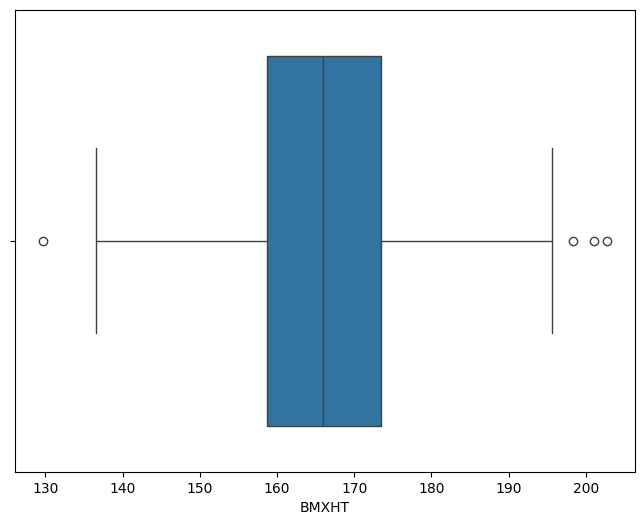

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.boxplot(x=da['BMXHT'])

plt.show()

In [7]:
import numpy as np
#VARIANCE
var=np.var(da['BMXHT'])
print(var)

101.57364907836697


In [14]:
#standard deviation
import numpy as np
sta_dev=np.sqrt(var)
print(sta_dev)


10.078375319383921


In [13]:
#Cofficent
cv=(sta_dev/da['BMXHT'].mean())*100
print(cv)

6.06609087354353


In [41]:
# Calculate Q1 and Q3
Q1 = da['BMXHT'].quantile(0.25)
Q3 = da['BMXHT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

14.800000000000011


In [40]:
# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(da['BMXHT'] >= lower_bound) & (da['BMXHT'] <= upper_bound)]

print("Outliers")
print(df_filtered)

Outliers
   values
0      10
1      12
2      14
3      15
4      18
5      20
6      22
7      30
8     100
9     105


<ipython-input-40-7bd83aece53d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df[(da['BMXHT'] >= lower_bound) & (da['BMXHT'] <= upper_bound)]


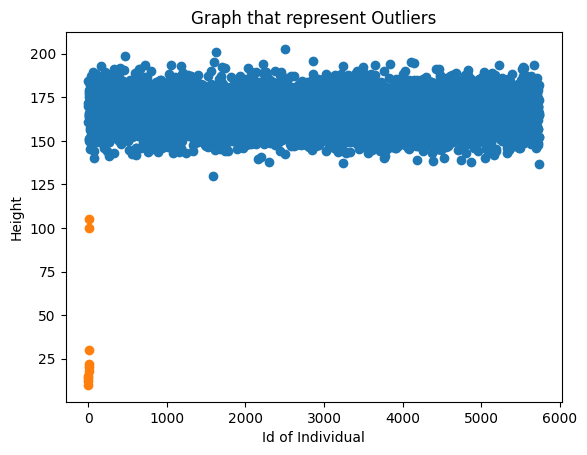

In [29]:
#Plot a graph that show outliers
plt.scatter(da['BMXHT'].index,da['BMXHT'])
plt.scatter(df_filtered.index,df_filtered)
plt.title('Graph that represent Outliers')
plt.xlabel('Id of Individual')
plt.ylabel('Height')
plt.show()

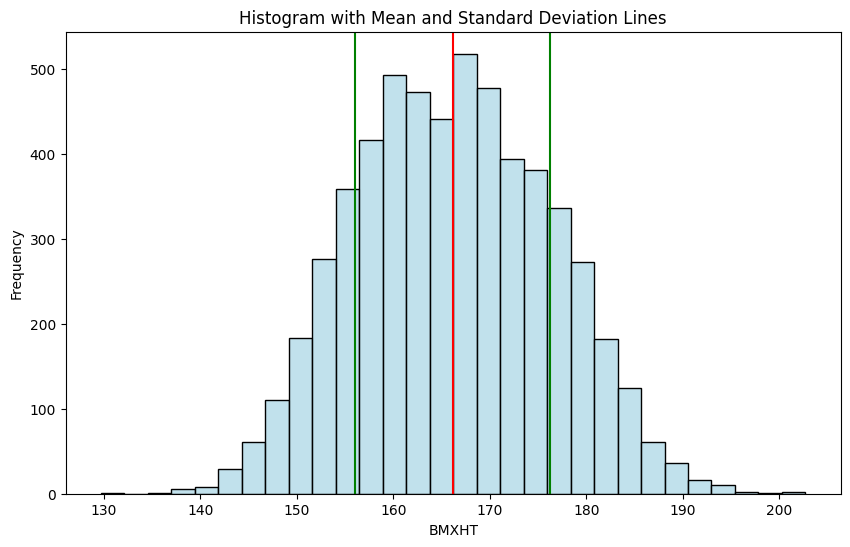

In [38]:
#Dispersion
mean_value = da['BMXHT'].mean()
std_dev_value = da['BMXHT'].std()

#Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(da['BMXHT'], bins=30, kde=False, color='lightblue')

# Add mean and standard deviation lines
plt.axvline(mean_value, color='red', linestyle='solid', linewidth=1.5)
plt.axvline(mean_value + std_dev_value, color='green', linestyle='solid', linewidth=1.5)
plt.axvline(mean_value - std_dev_value, color='green', linestyle='solid', linewidth=1.5)

plt.title('Histogram with Mean and Standard Deviation Lines')
plt.xlabel('BMXHT')
plt.ylabel('Frequency')
plt.show()